In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv("C:\\Contents\\Txt\MachineLearningWithPython-master\\MachineLearningWithPython-master\\Notebooks\\data\\pima-data.csv")

df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


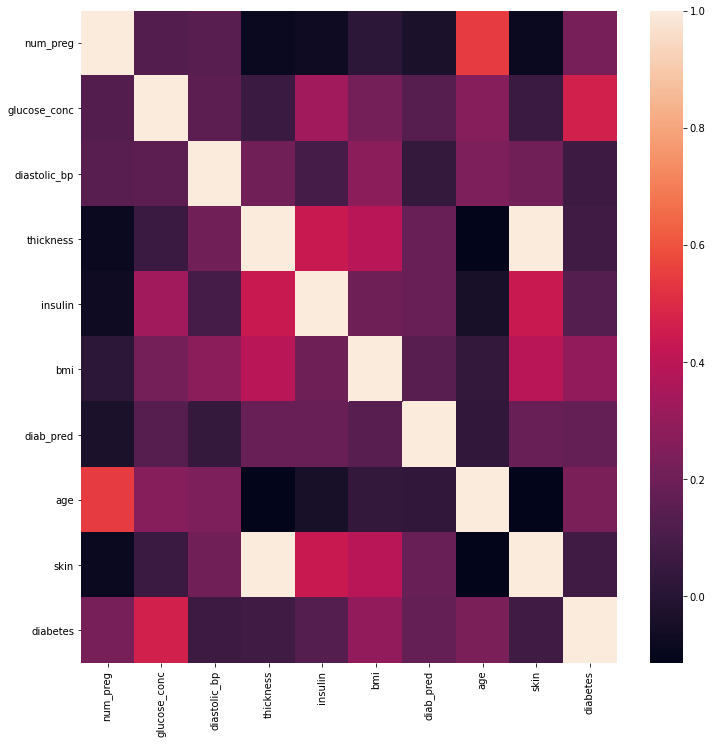

In [2]:
import seaborn as sb

plt.figure(figsize= (12,12))
sb.heatmap(df.corr())
plt.show()

In [3]:
del df['skin']

In [4]:
for col in df.columns:
    if df[col].isnull().values.any():
        print(col)

In [5]:
df.isnull().values.any()

False

In [6]:
diabetes_map = {True : 1, False :0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [7]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
np.random.seed(7)

from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
Y = df[predicted_class_names].values
split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)


Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(Dense(12,  input_dim=8, init= 'uniform', activation = "relu"))
model.add(Dense(8,  init= 'uniform', activation = "relu"))
model.add(Dense(1,   init= 'uniform', activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [11]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=150,validation_data=(X_test,y_test))

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 1s 2ms/step - loss: 0.6787 - accuracy: 0.6499 - val_loss: 0.6619 - val_accuracy: 0.6537
Epoch 2/150
537/537 [==============================] - 0s 307us/step - loss: 0.6658 - accuracy: 0.6499 - val_loss: 0.6553 - val_accuracy: 0.6537
Epoch 3/150
537/537 [==============================] - 0s 301us/step - loss: 0.6595 - accuracy: 0.6499 - val_loss: 0.6486 - val_accuracy: 0.6537
Epoch 4/150
537/537 [==============================] - 0s 309us/step - loss: 0.6509 - accuracy: 0.6499 - val_loss: 0.6368 - val_accuracy: 0.6537
Epoch 5/150
537/537 [==============================] - 0s 304us/step - loss: 0.6410 - accuracy: 0.6499 - val_loss: 0.6303 - val_accuracy: 0.6537
Epoch 6/150
537/537 [==============================] - 0s 310us/step - loss: 0.6292 - accuracy: 0.6499 - val_loss: 0.6219 - val_accuracy: 0.6537
Epoch 7/150
537/537 [==============================] - 0s 305us/step - loss: 0.6204 - 

Epoch 57/150
537/537 [==============================] - 0s 306us/step - loss: 0.5641 - accuracy: 0.6834 - val_loss: 0.5952 - val_accuracy: 0.7056
Epoch 58/150
537/537 [==============================] - 0s 306us/step - loss: 0.5653 - accuracy: 0.6946 - val_loss: 0.5926 - val_accuracy: 0.6926
Epoch 59/150
537/537 [==============================] - 0s 306us/step - loss: 0.5641 - accuracy: 0.6946 - val_loss: 0.5925 - val_accuracy: 0.6970
Epoch 60/150
537/537 [==============================] - 0s 320us/step - loss: 0.5604 - accuracy: 0.6853 - val_loss: 0.5982 - val_accuracy: 0.6926
Epoch 61/150
537/537 [==============================] - 0s 310us/step - loss: 0.5630 - accuracy: 0.6853 - val_loss: 0.5907 - val_accuracy: 0.6970
Epoch 62/150
537/537 [==============================] - 0s 317us/step - loss: 0.5625 - accuracy: 0.6965 - val_loss: 0.5916 - val_accuracy: 0.6926
Epoch 63/150
537/537 [==============================] - 0s 322us/step - loss: 0.5580 - accuracy: 0.6872 - val_loss: 0.5937 -

537/537 [==============================] - 0s 298us/step - loss: 0.5176 - accuracy: 0.7356 - val_loss: 0.5779 - val_accuracy: 0.6970
Epoch 114/150
537/537 [==============================] - 0s 320us/step - loss: 0.5245 - accuracy: 0.7188 - val_loss: 0.5880 - val_accuracy: 0.7056
Epoch 115/150
537/537 [==============================] - 0s 321us/step - loss: 0.5194 - accuracy: 0.7263 - val_loss: 0.5853 - val_accuracy: 0.6926
Epoch 116/150
537/537 [==============================] - 0s 312us/step - loss: 0.5166 - accuracy: 0.7188 - val_loss: 0.5648 - val_accuracy: 0.7273
Epoch 117/150
537/537 [==============================] - 0s 317us/step - loss: 0.5059 - accuracy: 0.7430 - val_loss: 0.5704 - val_accuracy: 0.7143
Epoch 118/150
537/537 [==============================] - 0s 320us/step - loss: 0.5047 - accuracy: 0.7393 - val_loss: 0.5663 - val_accuracy: 0.7273
Epoch 119/150
537/537 [==============================] - 0s 295us/step - loss: 0.4992 - accuracy: 0.7579 - val_loss: 0.5700 - val_ac

In [12]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150,validation_data=(X_test,y_test))

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 1s 2ms/step - loss: 0.4665 - accuracy: 0.7672 - val_loss: 0.5569 - val_accuracy: 0.7316
Epoch 2/150
537/537 [==============================] - 0s 82us/step - loss: 0.4621 - accuracy: 0.7784 - val_loss: 0.5579 - val_accuracy: 0.7359
Epoch 3/150
537/537 [==============================] - 0s 101us/step - loss: 0.4610 - accuracy: 0.7747 - val_loss: 0.5538 - val_accuracy: 0.7489
Epoch 4/150
537/537 [==============================] - 0s 97us/step - loss: 0.4580 - accuracy: 0.7709 - val_loss: 0.5570 - val_accuracy: 0.7316
Epoch 5/150
537/537 [==============================] - 0s 109us/step - loss: 0.4604 - accuracy: 0.7821 - val_loss: 0.5659 - val_accuracy: 0.7359
Epoch 6/150
537/537 [==============================] - 0s 105us/step - loss: 0.4629 - accuracy: 0.7765 - val_loss: 0.5603 - val_accuracy: 0.7229
Epoch 7/150
537/537 [==============================] - 0s 106us/step - loss: 0.4556 - ac

537/537 [==============================] - 0s 90us/step - loss: 0.4250 - accuracy: 0.7933 - val_loss: 0.5619 - val_accuracy: 0.7186
Epoch 58/150
537/537 [==============================] - 0s 82us/step - loss: 0.4260 - accuracy: 0.7970 - val_loss: 0.5539 - val_accuracy: 0.7273
Epoch 59/150
537/537 [==============================] - 0s 111us/step - loss: 0.4189 - accuracy: 0.7933 - val_loss: 0.5585 - val_accuracy: 0.7316
Epoch 60/150
537/537 [==============================] - 0s 97us/step - loss: 0.4175 - accuracy: 0.7952 - val_loss: 0.5596 - val_accuracy: 0.7316
Epoch 61/150
537/537 [==============================] - 0s 99us/step - loss: 0.4118 - accuracy: 0.7970 - val_loss: 0.5510 - val_accuracy: 0.7446
Epoch 62/150
537/537 [==============================] - 0s 91us/step - loss: 0.4141 - accuracy: 0.8026 - val_loss: 0.5629 - val_accuracy: 0.7100
Epoch 63/150
537/537 [==============================] - 0s 101us/step - loss: 0.4188 - accuracy: 0.7765 - val_loss: 0.5500 - val_accuracy: 0.7

537/537 [==============================] - 0s 85us/step - loss: 0.3971 - accuracy: 0.7896 - val_loss: 0.5658 - val_accuracy: 0.7186
Epoch 114/150
537/537 [==============================] - 0s 91us/step - loss: 0.3967 - accuracy: 0.8007 - val_loss: 0.5708 - val_accuracy: 0.7273
Epoch 115/150
537/537 [==============================] - 0s 102us/step - loss: 0.3957 - accuracy: 0.7989 - val_loss: 0.5657 - val_accuracy: 0.7186
Epoch 116/150
537/537 [==============================] - 0s 103us/step - loss: 0.3983 - accuracy: 0.7989 - val_loss: 0.5696 - val_accuracy: 0.7229
Epoch 117/150
537/537 [==============================] - 0s 104us/step - loss: 0.3928 - accuracy: 0.7933 - val_loss: 0.5713 - val_accuracy: 0.7403
Epoch 118/150
537/537 [==============================] - 0s 101us/step - loss: 0.3964 - accuracy: 0.7933 - val_loss: 0.5943 - val_accuracy: 0.7273
Epoch 119/150
537/537 [==============================] - 0s 94us/step - loss: 0.3996 - accuracy: 0.7914 - val_loss: 0.5676 - val_accur

In [13]:
### Another combination ###
model = Sequential()
model.add(Dense(12,  input_dim=8, init= 'uniform', activation = "relu"))
#model.add(Dense(8,  init= 'uniform', activation = "relu"))
model.add(Dense(1,   init= 'uniform', activation = "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [14]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=150,validation_data=(X_test,y_test))

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 1s 2ms/step - loss: 0.6843 - accuracy: 0.6108 - val_loss: 0.6567 - val_accuracy: 0.6537
Epoch 2/150
537/537 [==============================] - 0s 284us/step - loss: 0.6606 - accuracy: 0.6480 - val_loss: 0.6474 - val_accuracy: 0.6667
Epoch 3/150
537/537 [==============================] - 0s 312us/step - loss: 0.6517 - accuracy: 0.6555 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 4/150
537/537 [==============================] - 0s 290us/step - loss: 0.6435 - accuracy: 0.6443 - val_loss: 0.6309 - val_accuracy: 0.6580
Epoch 5/150
537/537 [==============================] - 0s 294us/step - loss: 0.6399 - accuracy: 0.6387 - val_loss: 0.6290 - val_accuracy: 0.6667
Epoch 6/150
537/537 [==============================] - 0s 288us/step - loss: 0.6311 - accuracy: 0.6704 - val_loss: 0.6282 - val_accuracy: 0.6623
Epoch 7/150
537/537 [==============================] - 0s 293us/step - loss: 0.6308 - 

Epoch 57/150
537/537 [==============================] - 0s 270us/step - loss: 0.5389 - accuracy: 0.7449 - val_loss: 0.5698 - val_accuracy: 0.7359
Epoch 58/150
537/537 [==============================] - 0s 281us/step - loss: 0.5441 - accuracy: 0.7356 - val_loss: 0.5726 - val_accuracy: 0.7316
Epoch 59/150
537/537 [==============================] - 0s 262us/step - loss: 0.5340 - accuracy: 0.7393 - val_loss: 0.5815 - val_accuracy: 0.7229
Epoch 60/150
537/537 [==============================] - 0s 297us/step - loss: 0.5297 - accuracy: 0.7579 - val_loss: 0.5805 - val_accuracy: 0.7316
Epoch 61/150
537/537 [==============================] - 0s 281us/step - loss: 0.5327 - accuracy: 0.7430 - val_loss: 0.5735 - val_accuracy: 0.7229
Epoch 62/150
537/537 [==============================] - 0s 274us/step - loss: 0.5362 - accuracy: 0.7505 - val_loss: 0.5669 - val_accuracy: 0.7229
Epoch 63/150
537/537 [==============================] - 0s 299us/step - loss: 0.5267 - accuracy: 0.7449 - val_loss: 0.5725 -

537/537 [==============================] - 0s 292us/step - loss: 0.4932 - accuracy: 0.7635 - val_loss: 0.5842 - val_accuracy: 0.7316
Epoch 114/150
537/537 [==============================] - 0s 287us/step - loss: 0.4932 - accuracy: 0.7579 - val_loss: 0.5807 - val_accuracy: 0.7316
Epoch 115/150
537/537 [==============================] - 0s 286us/step - loss: 0.4933 - accuracy: 0.7616 - val_loss: 0.5774 - val_accuracy: 0.7143
Epoch 116/150
537/537 [==============================] - 0s 287us/step - loss: 0.4931 - accuracy: 0.7709 - val_loss: 0.5738 - val_accuracy: 0.7229
Epoch 117/150
537/537 [==============================] - 0s 290us/step - loss: 0.4898 - accuracy: 0.7635 - val_loss: 0.5787 - val_accuracy: 0.7446
Epoch 118/150
537/537 [==============================] - 0s 288us/step - loss: 0.4931 - accuracy: 0.7616 - val_loss: 0.5765 - val_accuracy: 0.7359
Epoch 119/150
537/537 [==============================] - 0s 294us/step - loss: 0.4942 - accuracy: 0.7579 - val_loss: 0.5883 - val_ac